In [71]:
import numpy as np
import pandas as pd

In [72]:
# read excel into dataframe
df = pd.read_excel("bridge_projects.xlsx", sheet_name="Sheet1")
df.columns

Index(['Groups:',
       '10pnts 6 points for turning something in \n2 point deduction for being outside parameters \n2 point deduction for not having 1:1\nMinor Assessment BluePrint: ',
       'Blueprint is 1:1 Scale: 20 points', 'Blueprint Parameters: 5 points',
       'Blueprint Total: 50% Major Assessment', 'bridge_mass', 'bridge_load',
       'efficiency_score', 'Bridge Point Score',
       '\n((blueprint points)+ (performance points))/(Total Possible Points, 50)\nTotal Bridge Project Score:',
       'Total Points:', 'Potential Reasons for Bridge Failure', 'height',
       'width', 'length', 'type'],
      dtype='object')

In [73]:
# Only extra the columns we need, Groups, Bridge Mass, Bridge Load, Efficiency Score
# Assuming df is your DataFrame
columns_of_interest = ['Groups:', 'efficiency_score', 'bridge_load', 'bridge_mass', 'height', 'width', 'length', 'type']
new_df = df[columns_of_interest]

# only use rows 0 to 18
new_df = new_df.iloc[0:19, :]

# Cleaning new_df
new_df['Groups:'] = new_df['Groups:'].str.extract(r'(Group \d+:)')

# Display the modified DataFrame
new_df

# 


,Groups:,efficiency_score,bridge_load,bridge_mass,height,width,length,type
0,Group 1:,230.0,6900.0,30.0,11.5,6.50,36.0,Bowstring
1,Group 2:,879.0,27261.0,31.0,12.0,6.50,36.0,A-Truss
2,Group 3:,994.0,31797.0,32.0,16.0,5.50,33.0,A-Truss
3,Group 4:,531.0,12202.0,23.0,10.5,8.10,36.0,K-Truss
4,Group 5:,768.0,14600.0,19.0,10.0,6.50,35.0,Warren-Truss
5,Group 6:,1610.0,32200.0,20.0,10.5,7.00,35.5,A-Truss
6,Group 7:,1320.0,14515.0,11.0,10.0,5.70,33.1,A-Truss
7,Group 8:,375.0,5624.0,15.0,11.6,6.10,34.0,K-Truss
8,Group 9:,412.0,8482.0,20.6,13.3,7.00,36.0,Oval-Pratt
9,Group 10:,622.0,13426.0,21.6,10.1,6.40,34.4,Oval-Pratt


In [74]:
# sort the new_df by Efficiency Score
new_df = new_df.sort_values(by=['efficiency_score'], ascending=False)
new_df

,Groups:,efficiency_score,bridge_load,bridge_mass,height,width,length,type
5,Group 6:,1610.0,32200.0,20.0,10.5,7.00,35.5,A-Truss
18,Group 19:,1446.0,34700.0,24.0,NaN,NaN,NaN,NaN
14,Group 15:,1423.0,32160.0,22.6,16.0,6.20,35.5,A-Truss
6,Group 7:,1320.0,14515.0,11.0,10.0,5.70,33.1,A-Truss
2,Group 3:,994.0,31797.0,32.0,16.0,5.50,33.0,A-Truss
1,Group 2:,879.0,27261.0,31.0,12.0,6.50,36.0,A-Truss
4,Group 5:,768.0,14600.0,19.0,10.0,6.50,35.0,Warren-Truss
12,Group 13:,752.0,18053.0,24.0,10.8,6.30,33.7,K-Truss
15,Group 16:,714.0,13562.0,19.0,11.0,6.00,34.0,A-Truss
13,Group 14:,679.0,11884.0,17.5,10.0,5.20,34.0,Camelback


In [75]:
# sort the new_df by Bridge Mass
new_df = new_df.sort_values(by=['bridge_mass'], ascending=False)
new_df

,Groups:,efficiency_score,bridge_load,bridge_mass,height,width,length,type
2,Group 3:,994.0,31797.0,32.0,16.0,5.50,33.0,A-Truss
1,Group 2:,879.0,27261.0,31.0,12.0,6.50,36.0,A-Truss
0,Group 1:,230.0,6900.0,30.0,11.5,6.50,36.0,Bowstring
12,Group 13:,752.0,18053.0,24.0,10.8,6.30,33.7,K-Truss
18,Group 19:,1446.0,34700.0,24.0,NaN,NaN,NaN,NaN
3,Group 4:,531.0,12202.0,23.0,10.5,8.10,36.0,K-Truss
14,Group 15:,1423.0,32160.0,22.6,16.0,6.20,35.5,A-Truss
11,Group 12:,363.0,7983.0,22.0,10.1,6.75,35.5,K-Truss
9,Group 10:,622.0,13426.0,21.6,10.1,6.40,34.4,Oval-Pratt
17,Group 18:,207.0,4445.0,21.5,NaN,NaN,NaN,NaN


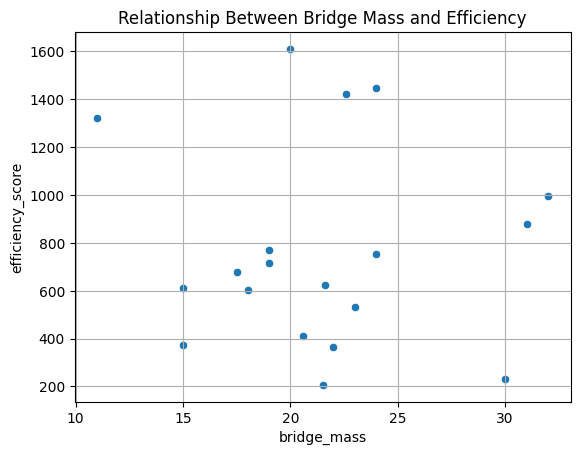

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame
sns.scatterplot(x='bridge_mass', y='efficiency_score', data=new_df)
plt.title('Relationship Between Bridge Mass and Efficiency')
plt.grid(True)  # Add gridlines
plt.show()



Pearson Correlation Coefficient: -0.035274113258993045


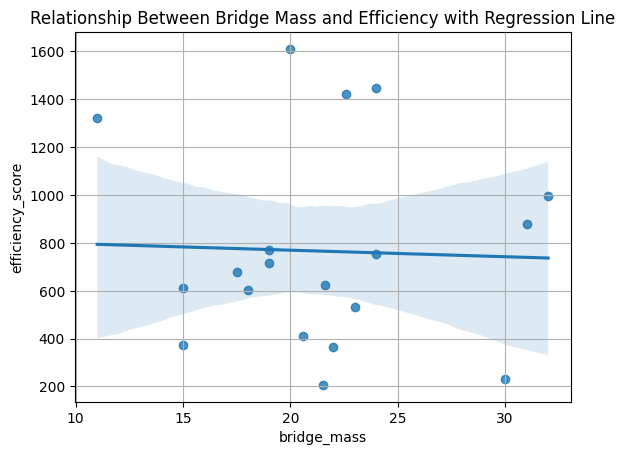

In [77]:
import seaborn as sns
from scipy.stats import pearsonr

# Assuming new_df is your DataFrame
mass = new_df['bridge_mass']
efficiency = new_df['efficiency_score']

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(mass, efficiency)
print(f"Pearson Correlation Coefficient: {correlation}")

# Create a scatter plot with regression line
sns.regplot(x=mass, y=efficiency)
plt.title('Relationship Between Bridge Mass and Efficiency with Regression Line')
plt.grid(True)
plt.show()


In [78]:
# import seaborn as sns
# from scipy.stats import pearsonr

# # Assuming new_df is your DataFrame
# mass = new_df['Height:']
# efficiency = new_df['Efficiency Score:']

# # Calculate Pearson correlation coefficient
# correlation, _ = pearsonr(mass, efficiency)
# print(f"Pearson Correlation Coefficient: {correlation}")

# # Create a scatter plot with regression line
# sns.regplot(x=mass, y=efficiency)
# plt.title('Relationship Between Bridge Mass and Efficiency with Regression Line')
# plt.grid(True)
# plt.show()

Pearson Correlation Coefficient: 0.2253514790307634


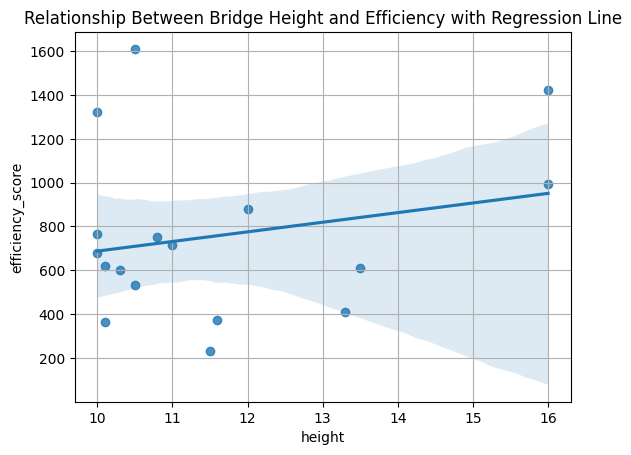

In [79]:
# The below code is dealing with nan values before it get the values later today

import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame
new_df_cleaned = new_df.dropna(subset=['height', 'efficiency_score'])

# Extract columns after NaN removal
mass = new_df_cleaned['height']
efficiency = new_df_cleaned['efficiency_score']

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(mass, efficiency)
print(f"Pearson Correlation Coefficient: {correlation}")

# Create a scatter plot with regression line
sns.regplot(x=mass, y=efficiency)
plt.title('Relationship Between Bridge Height and Efficiency with Regression Line')
plt.grid(True)
plt.show()


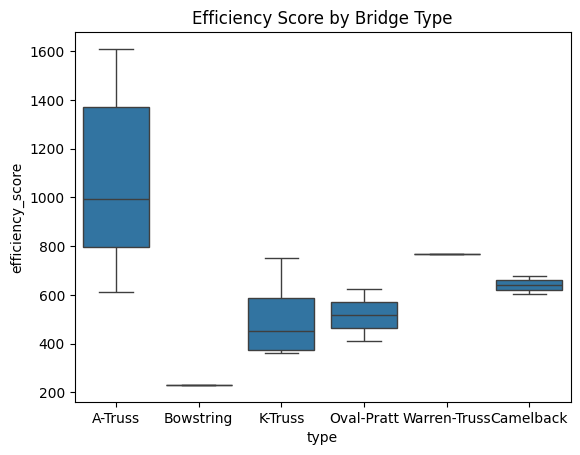

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='type', y='efficiency_score', data=new_df_cleaned)
plt.title('Efficiency Score by Bridge Type')
plt.show()


In [83]:
# sort the new_df by type and efficiency score and if it's an A-Truss in the type column
new_df_cleaned = new_df_cleaned.sort_values(by=['type', 'efficiency_score'], ascending=False)

# Only displat the A-Truss rows
new_df_cleaned = new_df_cleaned[new_df_cleaned['type'] == 'A-Truss']
new_df_cleaned

,Groups:,efficiency_score,bridge_load,bridge_mass,height,width,length,type
5,Group 6:,1610.0,32200.0,20.0,10.5,7.0,35.5,A-Truss
14,Group 15:,1423.0,32160.0,22.6,16.0,6.2,35.5,A-Truss
6,Group 7:,1320.0,14515.0,11.0,10.0,5.7,33.1,A-Truss
2,Group 3:,994.0,31797.0,32.0,16.0,5.5,33.0,A-Truss
1,Group 2:,879.0,27261.0,31.0,12.0,6.5,36.0,A-Truss
15,Group 16:,714.0,13562.0,19.0,11.0,6.0,34.0,A-Truss
10,Group 11:,611.0,9163.0,15.0,13.5,5.4,33.7,A-Truss


                sum_sq    df         F    PR(>F)
C(type)   1.398192e+06   5.0  3.133636  0.053179
Residual  9.816147e+05  11.0       NaN       NaN


C:\Users\mrwoo\AppData\Local\Temp\ipykernel_40868\2350141278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned.rename(columns={'Type:': 'type', 'Efficiency Score:': 'efficiency_score'}, inplace=True)
